# Denoising by Delaunay triangulation on zeros

In [38]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from methods.method_delaunay_triangulation import delaunay_triangulation_denoising

In [39]:
np.random.seed(10)
# signal parameters
SNRin = 30
N = 2**12
# Nsub = 2**12
sbank = SignalBank(N=N,)
tmin = sbank.tmin
tmax = sbank.tmax
# s = sbank.signal_linear_chirp()
s = sbank.signal_mc_parallel_chirps_unbalanced()
# s = sbank.signal_mc_parallel_chirps()

# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_double_cos_chirp()
# s = sbank.signal_mc_on_off_tones()
s = sbank.signal_mc_synthetic_mixture_2() # Mala.
# s = sbank.signal_mc_multi_cos_2()

signal, noise = add_snr(s,SNRin, complex_noise=False)
# signal = s + noise*np.sqrt(N/Nsub) 

snr_out:30.0


In [40]:
Nfft = 2*N
g,T = get_round_window(Nfft)
Lx = Nfft/T
S, F, stft_padded, Npad = get_spectrogram(signal, window = g)
output = delaunay_triangulation_denoising(signal,
                                            return_dic = True,
                                            # adapt_thr=True,
                                            grouping = False,
                                            min_group_size=4,
                                            LB = 1.6,
                                            )
signal_output, mask, tri, tri_select, zeros = ( output[key] for key in 
                                    ('s_r','mask','tri','tri_select','zeros')
                                    )



In [41]:
S_output, F_output, _, _ = get_spectrogram(signal_output, window = g)
print(10*np.log10((np.sum(s**2))/(np.sum((s-signal_output)**2))))

34.53292947729387


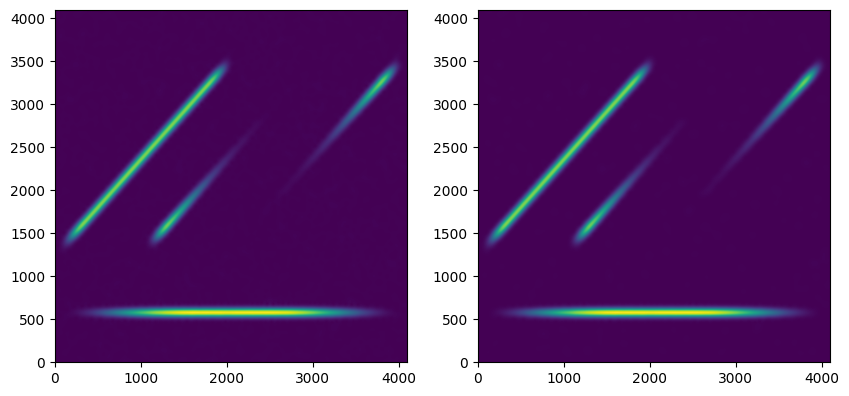

In [42]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

# ax[0].plot(signal.instf[0]*Nfft,'r')
# ax[0].plot(signal.instf[1]*Nfft,'r')
# ax[0].plot(signal.instf[2]*Nfft,'r')
plt.show()